Head of the Airline Passenger Data:
            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


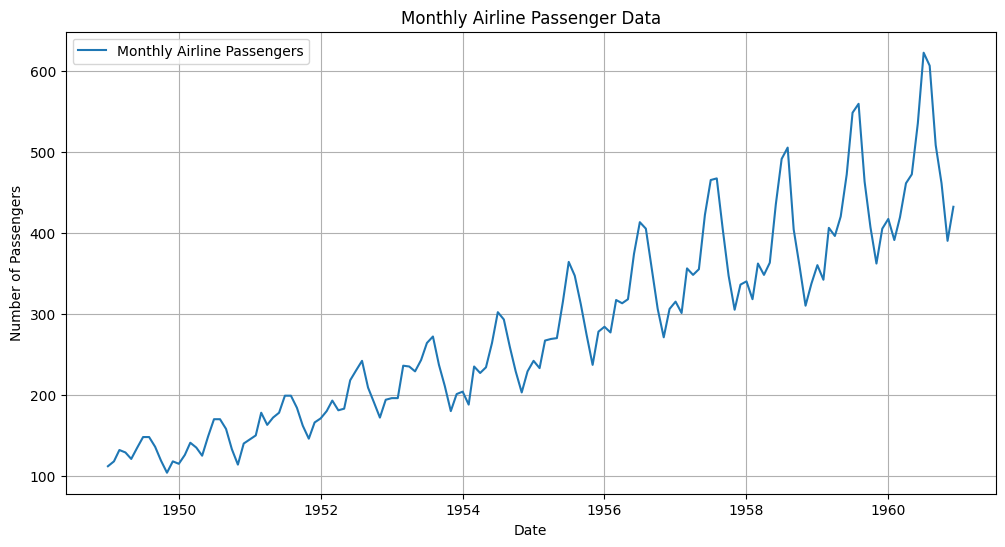

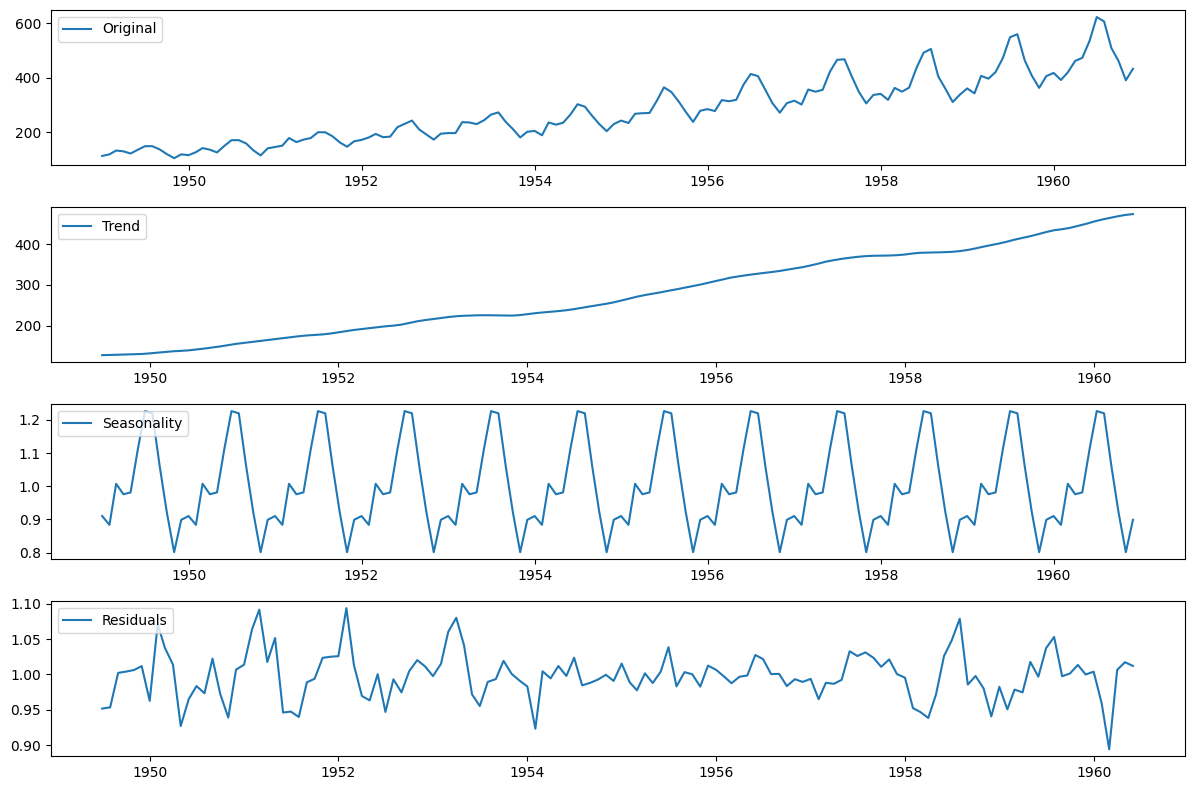


ADF Test on Original Data:
ADF Statistic: 0.8153688792060475
p-value: 0.991880243437641
Critical Values:
   1%, -3.4816817173418295
   5%, -2.8840418343195267
   10%, -2.578770059171598

ADF Test on First Differenced Data:
ADF Statistic: -2.829266824170006
p-value: 0.05421329028382468
Critical Values:
   1%, -3.4816817173418295
   5%, -2.8840418343195267
   10%, -2.578770059171598

ADF Test on Seasonal Differenced Data:
ADF Statistic: -15.595618083746338
p-value: 1.856511600123444e-28
Critical Values:
   1%, -3.4816817173418295
   5%, -2.8840418343195267
   10%, -2.578770059171598


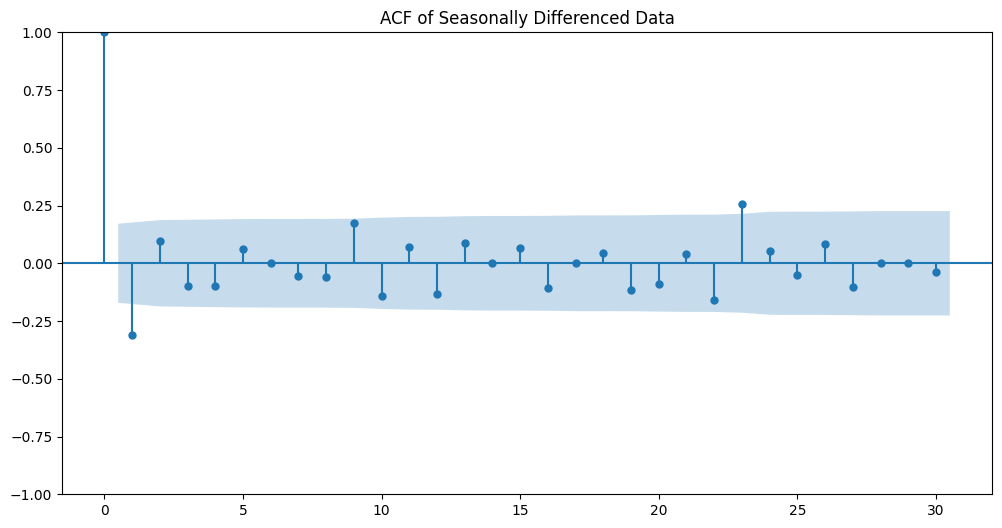

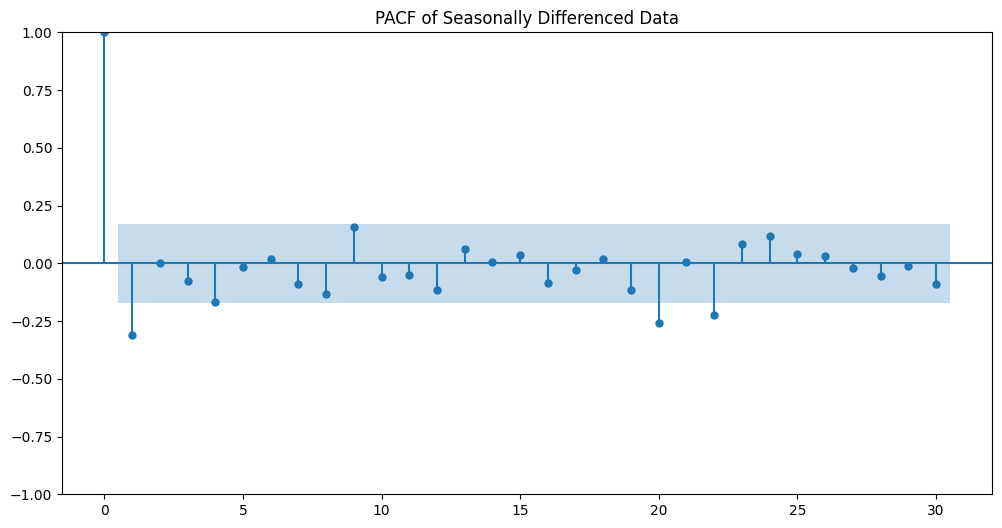

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



Mean Squared Error (MSE): 532.77
Root Mean Squared Error (RMSE): 23.08


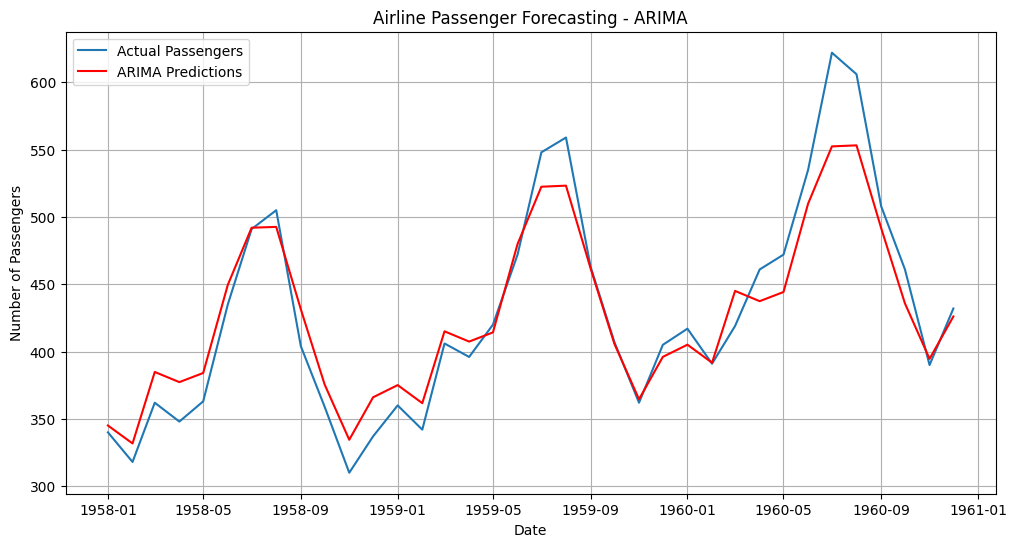

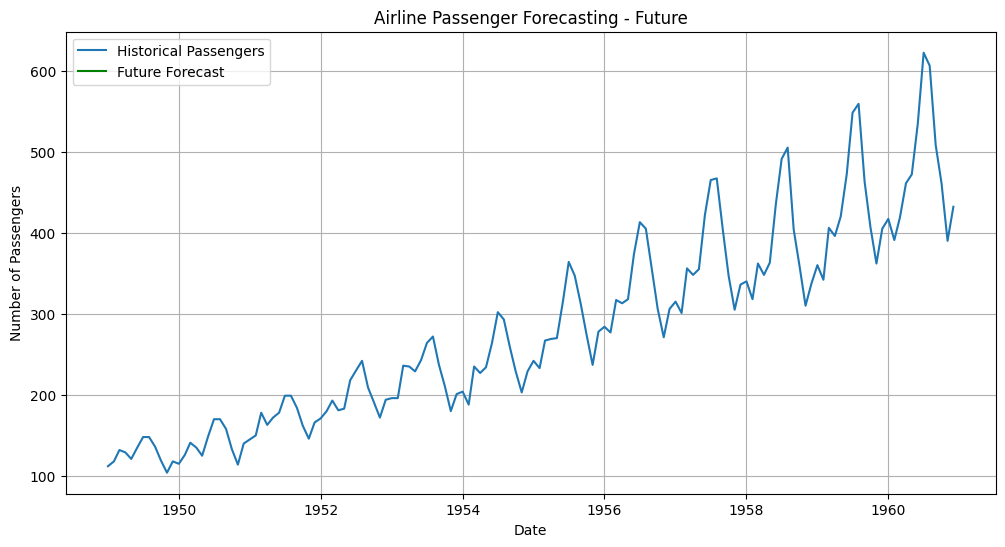


Future Passenger Forecast:
           Forecasted_Passengers
1960-12-01                   NaN
1961-01-01                   NaN
1961-02-01                   NaN
1961-03-01                   NaN
1961-04-01                   NaN
1961-05-01                   NaN
1961-06-01                   NaN
1961-07-01                   NaN
1961-08-01                   NaN
1961-09-01                   NaN
1961-10-01                   NaN
1961-11-01                   NaN
1961-12-01                   NaN
1962-01-01                   NaN
1962-02-01                   NaN
1962-03-01                   NaN
1962-04-01                   NaN
1962-05-01                   NaN
1962-06-01                   NaN
1962-07-01                   NaN
1962-08-01                   NaN
1962-09-01                   NaN
1962-10-01                   NaN
1962-11-01                   NaN
1962-12-01                   NaN
1963-01-01                   NaN
1963-02-01                   NaN
1963-03-01                   NaN
1963-04-01     

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# --- 1. Data Loading and Preparation ---
file_path = 'C:/Users/USER/Downloads/AirPassengers.csv'  # Adjust path if necessary

try:
    df = pd.read_csv(file_path, index_col='Month', parse_dates=True)
    df.rename(columns={'#Passengers': 'Passengers'}, inplace=True)
    df = df.dropna()
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    exit()

print("Head of the Airline Passenger Data:")
print(df.head())
print("\nData Info:")
df.info()

# Visualize the time series
plt.figure(figsize=(12, 6))
plt.plot(df['Passengers'], label='Monthly Airline Passengers')
plt.title('Monthly Airline Passenger Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

# --- 2. Time Series Decomposition ---
decomposition = seasonal_decompose(df['Passengers'], model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Passengers'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# --- 3. Stationarity Testing ---
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}, {value}')

print("\nADF Test on Original Data:")
adf_test(df['Passengers'])

# Differencing to make the series stationary
df['Passengers_diff'] = df['Passengers'].diff().dropna()
print("\nADF Test on First Differenced Data:")
adf_test(df['Passengers_diff'].dropna())  # Ensure no NaNs

# Further differencing to remove trend and seasonality (optional, based on ACF/PACF)
df['Passengers_diff_seasonal'] = df['Passengers_diff'].diff(12).dropna()
print("\nADF Test on Seasonal Differenced Data:")
adf_test(df['Passengers_diff_seasonal'].dropna())  # Ensure no NaNs

# --- 4. Model Selection (ARIMA) ---
# Plot ACF and PACF to identify potential p, q values
plt.figure(figsize=(12, 6))
plot_acf(df['Passengers_diff_seasonal'].dropna(), lags=30, ax=plt.gca())
plt.title('ACF of Seasonally Differenced Data')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['Passengers_diff_seasonal'].dropna(), lags=30, ax=plt.gca())
plt.title('PACF of Seasonally Differenced Data')
plt.show()

# Based on ACF/PACF, we might try ARIMA(p, d, q)(P, D, Q)s
# For example, based on typical airline data, we might guess (1, 1, 1)(1, 1, 0)12

# --- 5. Model Training and Evaluation ---
train_data = df['Passengers'][:-36]
test_data = df['Passengers'][-36:]

model = ARIMA(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))
model_fit = model.fit()

predictions = model_fit.predict(start=len(train_data), end=len(df['Passengers']) - 1)
mse = mean_squared_error(test_data, predictions)
rmse = sqrt(mse)
print(f'\nMean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Visualize the predictions against the actual test data
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Actual Passengers')
plt.plot(predictions, color='red', label='ARIMA Predictions')
plt.title('Airline Passenger Forecasting - ARIMA')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

# --- 6. Forecasting Future Values ---
future_steps = 36
forecast = model_fit.predict(start=len(df['Passengers']), end=len(df['Passengers']) + future_steps - 1)
forecast_index = pd.date_range(start=df.index[-1], periods=future_steps, freq='MS')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecasted_Passengers'])

# Visualize the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Passengers'], label='Historical Passengers')
plt.plot(forecast_df['Forecasted_Passengers'], color='green', label='Future Forecast')
plt.title('Airline Passenger Forecasting - Future')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

print("\nFuture Passenger Forecast:")
print(forecast_df)

print("\nRemember to complete the Excel and R parts of the assignment and write your reflection comparing the tools.")